Importamos librerias necesarias en la limpieza de datos (no olvidar instalar las libreras necesarias con pip install .. antes de importarlas)

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder,MinMaxScaler,OrdinalEncoder

import folium
import plotly.express as px


In [98]:
df_ca=pd.read_csv("commercial_activity_df.csv")
df_pd=pd.read_csv("products_df.csv")
df_so=pd.read_csv("sociodemographic_df.csv")

In [99]:
df_ca['Unnamed: 0']

0                 0
1                 1
2                 2
3                 3
4                 4
             ...   
5962919    13647304
5962920    13647305
5962921    13647306
5962922    13647307
5962923    13647308
Name: Unnamed: 0, Length: 5962924, dtype: int64

In [100]:
df_pd.shape

(5962924, 18)

In [101]:
df_so.shape

(5962924, 9)

In [102]:
df = pd.merge(pd.merge(df_ca, df_pd, on=[('pk_cid'),('pk_partition')], how='left'), df_so, on=[('pk_cid'),('pk_partition')], how='inner')

In [103]:
df.shape

(5962924, 30)

In [104]:
df.head()

,Unnamed: 0_x,pk_cid,pk_partition,entry_date,entry_channel,active_customer,segment,Unnamed: 0_y,short_term_deposit,loans,...,debit_card,em_account_p,em_acount,Unnamed: 0,country_id,region_code,gender,age,deceased,salary
0,0,1375586,2018-01-28,2018-01-12,KHL,1.0,02 - PARTICULARES,0,0,0,...,0,0,1,0,ES,29.0,H,35,N,87218.10
1,1,1050611,2018-01-28,2015-08-10,KHE,0.0,03 - UNIVERSITARIO,1,0,0,...,0,0,1,1,ES,13.0,V,23,N,35548.74
2,2,1050612,2018-01-28,2015-08-10,KHE,0.0,03 - UNIVERSITARIO,2,0,0,...,0,0,1,2,ES,13.0,V,23,N,122179.11
3,3,1050613,2018-01-28,2015-08-10,KHD,0.0,03 - UNIVERSITARIO,3,1,0,...,0,0,0,3,ES,50.0,H,22,N,119775.54
4,4,1050614,2018-01-28,2015-08-10,KHE,1.0,03 - UNIVERSITARIO,4,0,0,...,0,0,1,4,ES,50.0,V,23,N,NaN


In [105]:
n_index = 'Index'
df = df.rename_axis(n_index).reset_index()

In [106]:
df.set_index('Index', inplace=True)

In [107]:
del(df["Unnamed: 0"])

In [108]:
del(df["Unnamed: 0_x"])

In [109]:
del(df["Unnamed: 0_y"])

In [110]:
df.head()

,pk_cid,pk_partition,entry_date,entry_channel,active_customer,segment,short_term_deposit,loans,mortgage,funds,...,emc_account,debit_card,em_account_p,em_acount,country_id,region_code,gender,age,deceased,salary
Index,,,,,,,,,,,,,,,,,,,,,
0,1375586,2018-01-28,2018-01-12,KHL,1.0,02 - PARTICULARES,0,0,0,0,...,0,0,0,1,ES,29.0,H,35,N,87218.10
1,1050611,2018-01-28,2015-08-10,KHE,0.0,03 - UNIVERSITARIO,0,0,0,0,...,0,0,0,1,ES,13.0,V,23,N,35548.74
2,1050612,2018-01-28,2015-08-10,KHE,0.0,03 - UNIVERSITARIO,0,0,0,0,...,0,0,0,1,ES,13.0,V,23,N,122179.11
3,1050613,2018-01-28,2015-08-10,KHD,0.0,03 - UNIVERSITARIO,1,0,0,0,...,0,0,0,0,ES,50.0,H,22,N,119775.54
4,1050614,2018-01-28,2015-08-10,KHE,1.0,03 - UNIVERSITARIO,0,0,0,0,...,0,0,0,1,ES,50.0,V,23,N,NaN


In [111]:
for i in ["pk_partition","entry_date"]:
    df[i]=pd.to_datetime(df[i],format='%Y-%m-%d',errors="coerce")

In [112]:
df.isnull().sum()

pk_cid                      0
pk_partition                0
entry_date               6413
entry_channel          133033
active_customer             0
segment                133944
short_term_deposit          0
loans                       0
mortgage                    0
funds                       0
securities                  0
long_term_deposit           0
em_account_pp               0
credit_card                 0
payroll                    61
pension_plan               61
payroll_account             0
emc_account                 0
debit_card                  0
em_account_p                0
em_acount                   0
country_id                  0
region_code              2264
gender                     25
age                         0
deceased                    0
salary                1512103
dtype: int64

In [113]:
df.dropna(subset = ["entry_date"], inplace=True)

In [114]:
df.dropna(subset = ["payroll"], inplace=True)

In [115]:
df.dropna(subset = ["pension_plan"], inplace=True)

In [116]:
df.dropna(subset = ["region_code"], inplace=True)

In [117]:
df.dropna(subset = ["gender"], inplace=True)

In [118]:
df.isnull().sum()

pk_cid                      0
pk_partition                0
entry_date                  0
entry_channel          132054
active_customer             0
segment                132981
short_term_deposit          0
loans                       0
mortgage                    0
funds                       0
securities                  0
long_term_deposit           0
em_account_pp               0
credit_card                 0
payroll                     0
pension_plan                0
payroll_account             0
emc_account                 0
debit_card                  0
em_account_p                0
em_acount                   0
country_id                  0
region_code                 0
gender                      0
age                         0
deceased                    0
salary                1504871
dtype: int64

In [119]:
mean_por_grupo = df.groupby('region_code')['salary'].median()

In [120]:
df['salary'] = df['salary'].fillna(df['region_code'].map(mean_por_grupo))

In [121]:
df.isnull().sum()

pk_cid                     0
pk_partition               0
entry_date                 0
entry_channel         132054
active_customer            0
segment               132981
short_term_deposit         0
loans                      0
mortgage                   0
funds                      0
securities                 0
long_term_deposit          0
em_account_pp              0
credit_card                0
payroll                    0
pension_plan               0
payroll_account            0
emc_account                0
debit_card                 0
em_account_p               0
em_acount                  0
country_id                 0
region_code                0
gender                     0
age                        0
deceased                   0
salary                     0
dtype: int64

In [122]:
df[df.duplicated()]

,pk_cid,pk_partition,entry_date,entry_channel,active_customer,segment,short_term_deposit,loans,mortgage,funds,...,emc_account,debit_card,em_account_p,em_acount,country_id,region_code,gender,age,deceased,salary
Index,,,,,,,,,,,,,,,,,,,,,


In [123]:
# df.hist()

In [124]:
df["entry_channel"].value_counts()

entry_channel
KHE    3113725
KFC     889284
KHQ     590280
KAT     414862
KHK     230132
        ...   
KES         11
KEJ          8
KHS          5
KDA          2
KFP          2
Name: count, Length: 67, dtype: int64

In [125]:
def obten_lista_eliminar(dataset, columna, umbral):
  lista_borrar= []  
  tabla=dataset[columna].value_counts().reset_index()
  print(tabla)
  for i in range(0,len(tabla)):
    if (tabla.iloc[i]["count"]) < umbral:
      lista_borrar.append(tabla.iloc[i][columna])
  return lista_borrar


In [126]:
lista_eliminar_entry = obten_lista_eliminar(df, "entry_channel", 6000)

   entry_channel    count
0            KHE  3113725
1            KFC   889284
2            KHQ   590280
3            KAT   414862
4            KHK   230132
..           ...      ...
62           KES       11
63           KEJ        8
64           KHS        5
65           KDA        2
66           KFP        2

[67 rows x 2 columns]


In [127]:
def eliminar_lista_df(dataset, columna, lista_eliminar):
  dataset.drop(dataset[dataset[columna].isin(lista_eliminar)].index, inplace=True)

In [128]:
eliminar_lista_df(df,"entry_channel",lista_eliminar_entry)

In [129]:
df["entry_channel"].value_counts()

entry_channel
KHE    3113725
KFC     889284
KHQ     590280
KAT     414862
KHK     230132
KHM     173468
KHN     107904
KFA      78752
KHD      75029
RED      60538
KHL      41719
KHF      20657
KHO       8229
Name: count, dtype: int64

In [130]:
#Exploramos ahora la otra columna con nulos, "segment"

df["segment"].value_counts()

segment
03 - UNIVERSITARIO    3895898
02 - PARTICULARES     1811466
01 - TOP                96374
Name: count, dtype: int64

In [131]:
#Vemos que universitario es el valor más repetido, y podriamos imputar los nulos como universitarios, ya que los 132k de nulos no representan una gran diferencia, pero esto podría suponer "falsear" los datos.
#Sería una buena aproximación inicial, pero HAY QUE REFINARLO EN PROXIMOS PASOS

df["segment"].fillna(df['segment'].mode().iloc[0],inplace = True)

C:\Users\dvdgo\AppData\Local\Temp\ipykernel_14592\478235944.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["segment"].fillna(df['segment'].mode().iloc[0],inplace = True)


In [132]:
#Comprobamos que no queden nulos
df[df["segment"].isnull()]

,pk_cid,pk_partition,entry_date,entry_channel,active_customer,segment,short_term_deposit,loans,mortgage,funds,...,emc_account,debit_card,em_account_p,em_acount,country_id,region_code,gender,age,deceased,salary
Index,,,,,,,,,,,,,,,,,,,,,


In [133]:
#Vamos a tratar ahora los nulos de la columna "entry_channel"

df_ca.isnull().sum()

Unnamed: 0              0
pk_cid                  0
pk_partition            0
entry_date              0
entry_channel      133033
active_customer         0
segment            133944
dtype: int64

In [134]:
#Dado que son muchos nulos y los valores posibles muy distintos, imputar una moda puede inducir errores. Para ello, seleccionaremos para cada "segment", su moda de "entry_channel". Hecho esto, imputaremos dicha moda a los nulos en funcion de su "segment"

###                                                                     ###
###     ESTA SECCIÓN ES NECESARIO OPTIMIZARLA, SON DEMASIADOS PASOS     ###
###                Y TARDA DEMASIADO                                    ###
###                                                                     ###

# Calculamos la moda de entry_channel para cada segmento
modas = df.groupby('segment')['entry_channel'].apply(lambda x: x.mode().iloc[0])

# Llenamos los valores nulos en entry_channel con las modas calculadas para su respectivo segmento
for segment, moda in modas.items():
    df.loc[(df['segment'] == segment) & (df['entry_channel'].isnull()), 'entry_channel'] = moda

In [135]:
df["entry_channel"].value_counts()

entry_channel
KHE    3245330
KFC     889733
KHQ     590280
KAT     414862
KHK     230132
KHM     173468
KHN     107904
KFA      78752
KHD      75029
RED      60538
KHL      41719
KHF      20657
KHO       8229
Name: count, dtype: int64

In [136]:
#Ahora que no quedan nulos, revisaremos el resto de columnas
df.isnull().sum()

pk_cid                0
pk_partition          0
entry_date            0
entry_channel         0
active_customer       0
segment               0
short_term_deposit    0
loans                 0
mortgage              0
funds                 0
securities            0
long_term_deposit     0
em_account_pp         0
credit_card           0
payroll               0
pension_plan          0
payroll_account       0
emc_account           0
debit_card            0
em_account_p          0
em_acount             0
country_id            0
region_code           0
gender                0
age                   0
deceased              0
salary                0
dtype: int64

In [137]:
#Columna pk_partition
df_ca["pk_partition"].value_counts()

pk_partition
2019-05-28    442995
2019-04-28    439627
2019-03-28    436183
2019-02-28    431727
2019-01-28    426875
2018-12-28    422481
2018-11-28    416387
2018-10-28    402300
2018-09-28    375323
2018-08-28    352922
2018-07-28    339339
2018-06-28    252104
2018-05-28    249926
2018-04-28    247463
2018-03-28    245258
2018-02-28    242521
2018-01-28    239493
Name: count, dtype: int64

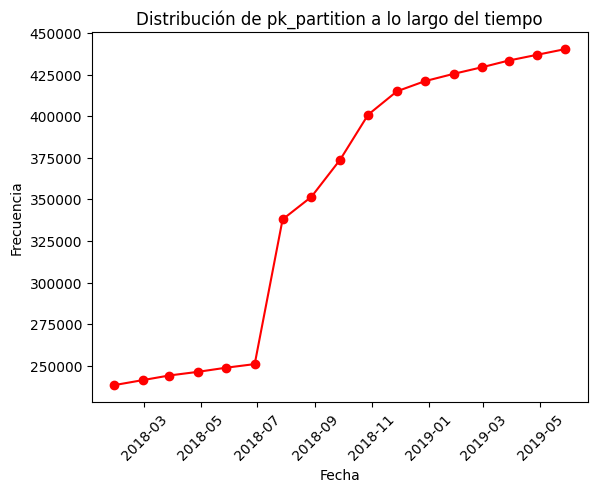

In [138]:
#Esta columna solo nos da informacion del periodo en el que se recogieron los datos. Es interesante ver como la ingesta de datos aumenta con el paso del tiempo y hay un especial repunte en Julio/2018


# Creamos una grafica con los valores
plt.plot(df["pk_partition"].value_counts().index, df["pk_partition"].value_counts().values, marker='o', linestyle='-', color='r')

# Añadismos etiquetas y título y la mostramos
plt.xlabel('Fecha')
plt.ylabel('Frecuencia')
plt.title('Distribución de pk_partition a lo largo del tiempo')
plt.xticks(rotation=45)


plt.show()

In [139]:
#Columna entry_date
df_ca["entry_date"].value_counts()

entry_date
2017-07-28    57389
2017-10-03    54287
2017-08-04    45746
2016-10-14    40804
2016-08-03    33414
              ...  
2015-04-29       11
2016-06-15       11
2015-08-19       11
2018-05-31        9
2017-05-01        7
Name: count, Length: 1499, dtype: int64

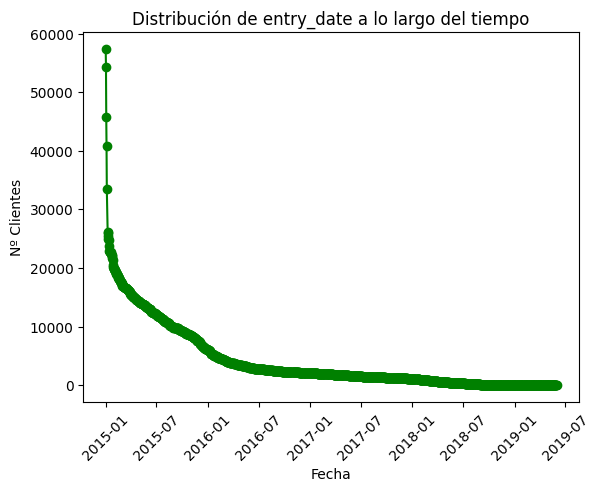

In [140]:
#Esta columna nos da informacion de la fecha en que la que se hizo la primera contratación. Vamos a dibujarla para obtener las información


# Creamos una grafica con los valores
plt.plot(df["entry_date"].value_counts().sort_index().index, df["entry_date"].value_counts().values, marker='o', linestyle='-', color='g')

# Añadismos etiquetas y título y la mostramos
plt.xlabel('Fecha')
plt.ylabel('Nº Clientes')
plt.title('Distribución de entry_date a lo largo del tiempo')
plt.xticks(rotation=45)


plt.show()

In [141]:
#La contratación de nuevos clientes ha seguidos una constante descente a lo largo del tiempo.
#Podemos ver cuantos clientes nuevos ha habido en el mes de Mayo de 2019

len(df[(df["entry_date"] >= "2019-05-01")])

#Por tanto en el mes de Mayo de 2019, hubo 4380 nuevos clientes.

4380

In [142]:
df[(df["entry_date"] >= "2019-05-01")]

,pk_cid,pk_partition,entry_date,entry_channel,active_customer,segment,short_term_deposit,loans,mortgage,funds,...,emc_account,debit_card,em_account_p,em_acount,country_id,region_code,gender,age,deceased,salary
Index,,,,,,,,,,,,,,,,,,,,,
5519930,657817,2019-05-28,2019-05-12,KHE,0.0,03 - UNIVERSITARIO,0,0,0,0,...,0,0,0,0,ES,8.0,V,32,N,124656.36
5519962,660317,2019-05-28,2019-05-06,KFC,0.0,03 - UNIVERSITARIO,0,0,0,0,...,0,0,0,0,ES,28.0,H,40,N,126765.57
5520015,677280,2019-05-28,2019-05-05,KHE,0.0,03 - UNIVERSITARIO,0,0,0,0,...,0,0,0,0,ES,28.0,V,38,N,126765.57
5520023,678711,2019-05-28,2019-05-21,KHE,1.0,03 - UNIVERSITARIO,0,0,0,0,...,0,0,0,1,ES,39.0,V,50,N,89202.00
5520048,663346,2019-05-28,2019-05-17,KHE,0.0,03 - UNIVERSITARIO,0,0,0,0,...,0,0,0,0,ES,46.0,V,40,N,68052.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5943436,1190195,2019-05-28,2019-05-22,KHE,0.0,03 - UNIVERSITARIO,0,0,0,0,...,0,0,0,0,ES,46.0,H,43,N,68052.93
5947366,1186046,2019-05-28,2019-05-27,KHE,0.0,03 - UNIVERSITARIO,0,0,0,0,...,0,0,0,0,ES,37.0,V,53,N,86312.43
5947993,1185013,2019-05-28,2019-05-14,KHE,1.0,03 - UNIVERSITARIO,0,0,0,0,...,0,0,0,1,ES,23.0,V,53,N,64164.72


In [143]:
#Restando el numero de registros del mes de mayo, menos los del mes anterior, podemos ver el total de nuevos registros o "ventas". De todas las 6904 ventas t otales, 4380 fueron a nuevos clientes
len(df_ca[(df_ca["pk_partition"] == "2019-05-28")]) - len(df_ca[(df_ca["pk_partition"] == "2019-03-28")])

6812

In [144]:
#Columna active_customer
df_ca["active_customer"].value_counts()

active_customer
0.0    3557573
1.0    2405351
Name: count, dtype: int64

In [145]:
#En %
df_ca["active_customer"].value_counts(normalize=True) * 100

#Solo el 40% de los clientes son clientes activos en la APP, lo que daría margen a promociones que incluyan el registro en la APP

active_customer
0.0    59.661552
1.0    40.338448
Name: proportion, dtype: float64

In [146]:
### PARA LA TUTORIA ###
# 1- TARGET ?¿  lo tenemos que crear nosotros el target?.
# Entendemos que es una clasificación, ya que el objetivo del analisis es la propresión de compra de los clientes, usamos la columna nueva "cliente habitual" ?¿?¿ 

# 2- DF , ahora mismo tenemos 3 dataset distintos, tenemos que unirlos en uno solo y eliminar las columnas repetidas ¿?¿?¿

In [147]:
df["credit_card"].value_counts()

credit_card
0    5867226
1      69407
Name: count, dtype: int64

In [148]:
#Parece que el dataframe es un dataframe binario, tiene la info de cada cliente, 
# y te da información con 0 y 1 si tiene o no ese producto. 

In [149]:
# Contamos los valores unicos que hay en gender
df['gender'].unique()

array(['H', 'V'], dtype=object)

In [150]:
### PODRIAMOS CONVERTIR A NUMERICO CON UN ENCONDER BINARIO 

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5936633 entries, 0 to 5962923
Data columns (total 27 columns):
 #   Column              Dtype         
---  ------              -----         
 0   pk_cid              int64         
 1   pk_partition        datetime64[ns]
 2   entry_date          datetime64[ns]
 3   entry_channel       object        
 4   active_customer     float64       
 5   segment             object        
 6   short_term_deposit  int64         
 7   loans               int64         
 8   mortgage            int64         
 9   funds               int64         
 10  securities          int64         
 11  long_term_deposit   int64         
 12  em_account_pp       int64         
 13  credit_card         int64         
 14  payroll             float64       
 15  pension_plan        float64       
 16  payroll_account     int64         
 17  emc_account         int64         
 18  debit_card          int64         
 19  em_account_p        int64         
 20  em_acou

In [152]:
def obtener_lista_variables(df):
  lista_num = []
  lista_bool = []
  lista_cat = []

  for i in df:
    if (df[i].dtype.kind in "i" or df[i].dtype.kind=="f") and \
    len(df[i].unique()) != 2:
      lista_num.append(i)
    elif (df[i].dtype.kind=="i" or df[i].dtype.kind=="f") and \
    len(df[i].unique()) == 2:
      lista_bool.append(i)
    elif (df[i].dtype.kind=="O" ):
      lista_cat.append(i)

  return lista_num, lista_bool, lista_cat

In [153]:
lnum, lbool, lcat = obtener_lista_variables(df)

In [154]:
lnum

['pk_cid', 'em_account_pp', 'region_code', 'age', 'salary']

In [155]:
lbool

['active_customer',
 'short_term_deposit',
 'loans',
 'mortgage',
 'funds',
 'securities',
 'long_term_deposit',
 'credit_card',
 'payroll',
 'pension_plan',
 'payroll_account',
 'emc_account',
 'debit_card',
 'em_account_p',
 'em_acount']

In [156]:
lcat

['entry_channel', 'segment', 'country_id', 'gender', 'deceased']

In [157]:
# Mapeamos la columna 'gender' para hacerla booleana y asignar los valores {'H': 0, 'V': 1}
df['gender'] = df['gender'].map({'H': 0, 'V': 1})

In [158]:
df.head()

,pk_cid,pk_partition,entry_date,entry_channel,active_customer,segment,short_term_deposit,loans,mortgage,funds,...,emc_account,debit_card,em_account_p,em_acount,country_id,region_code,gender,age,deceased,salary
Index,,,,,,,,,,,,,,,,,,,,,
0,1375586,2018-01-28,2018-01-12,KHL,1.0,02 - PARTICULARES,0,0,0,0,...,0,0,0,1,ES,29.0,0,35,N,87218.10
1,1050611,2018-01-28,2015-08-10,KHE,0.0,03 - UNIVERSITARIO,0,0,0,0,...,0,0,0,1,ES,13.0,1,23,N,35548.74
2,1050612,2018-01-28,2015-08-10,KHE,0.0,03 - UNIVERSITARIO,0,0,0,0,...,0,0,0,1,ES,13.0,1,23,N,122179.11
3,1050613,2018-01-28,2015-08-10,KHD,0.0,03 - UNIVERSITARIO,1,0,0,0,...,0,0,0,0,ES,50.0,0,22,N,119775.54
4,1050614,2018-01-28,2015-08-10,KHE,1.0,03 - UNIVERSITARIO,0,0,0,0,...,0,0,0,1,ES,50.0,1,23,N,96796.23


In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5936633 entries, 0 to 5962923
Data columns (total 27 columns):
 #   Column              Dtype         
---  ------              -----         
 0   pk_cid              int64         
 1   pk_partition        datetime64[ns]
 2   entry_date          datetime64[ns]
 3   entry_channel       object        
 4   active_customer     float64       
 5   segment             object        
 6   short_term_deposit  int64         
 7   loans               int64         
 8   mortgage            int64         
 9   funds               int64         
 10  securities          int64         
 11  long_term_deposit   int64         
 12  em_account_pp       int64         
 13  credit_card         int64         
 14  payroll             float64       
 15  pension_plan        float64       
 16  payroll_account     int64         
 17  emc_account         int64         
 18  debit_card          int64         
 19  em_account_p        int64         
 20  em_acou

In [160]:
# Mapeamos la columna 'deceased' para hacerla booleana y asignar los valores {'H': 0, 'V': 1}
df['deceased'] = df['deceased'].map({'N': 0, 'S': 1})

In [161]:
# Definir la tabla de mapeo
values_to_impute_country_id = {
    "ES": 0,
    "CA": 1,
    "CH": 2,
    "CL": 3,
    "IE": 4,
    "AT": 5,
    "FR": 6,
    "GB": 7,
    "DE": 8,
    "DO": 9,
    "BE": 10,
    "AR": 11,
    "VE": 12,
    "US": 13,
    "MX": 14,
    "PL": 15,
    "MA": 16,
    "GT": 17,
    "GA": 18,
    "CO": 19,
    "BR": 20,
    "RU": 21,
    "IT": 22,
    "NO": 23,
    "SN": 24,
    "MR": 25,
    "ET": 26,
    "CN": 27,
    "CM": 28,
    "SA": 29,
    "CI": 30,
    "QA": 31,
    "LU": 32,
    "SE": 33,
    "DJ": 34,
    "PT": 35,
    "JM": 36,
    "RO": 37,
    "HU": 38,
    "DZ": 39,
    "PE": 40
}

In [162]:
# Mapeamos la columna 'country_id' para hacerla numerica y asignar los valores {values_to_impute_country_id}

df['country_id'] = df['country_id'].map(values_to_impute_country_id)

In [163]:
# Mapeamos la columna 'segment' para hacerla numerica y asignar los valores {'03 Universatario': 3, '02 Particulares': 2, "01 TOP": 1}
df['segment'] = df['segment'].map({'03 - UNIVERSITARIO': 3, '02 - PARTICULARES': 2,'01 - TOP': 1})

In [164]:
df.to_csv("clean_data.csv", index = True)

In [166]:
df

,pk_cid,pk_partition,entry_date,entry_channel,active_customer,segment,short_term_deposit,loans,mortgage,funds,...,debit_card,em_account_p,em_acount,country_id,region_code,gender,age,deceased,salary,Financiacion
Index,,,,,,,,,,,,,,,,,,,,,
0,1375586,2018-01-28,2018-01-12,KHL,1.0,2,0,0,0,0,...,0,0,1,0,29.0,0,35,0,87218.10,0
1,1050611,2018-01-28,2015-08-10,KHE,0.0,3,0,0,0,0,...,0,0,1,0,13.0,1,23,0,35548.74,0
2,1050612,2018-01-28,2015-08-10,KHE,0.0,3,0,0,0,0,...,0,0,1,0,13.0,1,23,0,122179.11,0
3,1050613,2018-01-28,2015-08-10,KHD,0.0,3,1,0,0,0,...,0,0,0,0,50.0,0,22,0,119775.54,0
4,1050614,2018-01-28,2015-08-10,KHE,1.0,3,0,0,0,0,...,0,0,1,0,50.0,1,23,0,96796.23,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5962919,1166765,2019-05-28,2016-08-14,KHE,0.0,3,0,0,0,0,...,0,0,1,0,50.0,1,22,0,43912.17,0
5962920,1166764,2019-05-28,2016-08-14,KHE,0.0,3,0,0,0,0,...,0,0,1,0,26.0,1,23,0,23334.99,0
5962921,1166763,2019-05-28,2016-08-14,KHE,1.0,2,0,0,0,0,...,0,0,1,0,50.0,0,47,0,96796.23,0
